In [1]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
import pandas as pd
from sklearn.preprocessing import StandardScaler #Z-score variables
from adjustText import adjust_text
import openpyxl
import matplotlib as plt
import numpy as np

In [2]:
#clustering PA Efficiency
data = pd.read_csv("Cape Cod 2021 TB Tracker.csv")
data = data.fillna(0)
data

Player Team   AB  1B   2B   3B   HR  TB/AB  BB/K
0       C Bender  BOR   33   7  1.0  0.0  1.0   0.39  0.20
1       K. Fedko  BOR   50  11  0.0  0.0  0.0   0.22  0.21
2     D. Rushing  BOR  118  22  9.0  0.0  6.0   0.54  0.55
3    C. Knapczyk  BOR  109  26  8.0  1.0  0.0   0.41  0.81
4     C. Wallace  BOR   62  11  5.0  0.0  2.0   0.47  0.32
..           ...  ...  ...  ..  ...  ...  ...    ...   ...
150    D. Bowser   YD   72  11  2.0  0.0  1.0   0.26  0.39
151       Z. Lew   YD   80  10  2.0  0.0  0.0   0.18  0.38
152    C. Hunter   YD   56   5  4.0  0.0  1.0   0.30  0.30
153    D. Keegan   YD   43   8  0.0  0.0  5.0   0.65  0.42
154  T. Williams   YD   41   5  0.0  0.0  0.0   0.12  0.00

[155 rows x 9 columns]

In [6]:
data = data[data["AB"] >=28]

In [7]:
#z-score variables
predictors = ["TB/AB" , "BB/K"]
X = data[predictors]
z = StandardScaler()
zScored = z.fit_transform(X)
data[predictors] = zScored
data.head()
data

Player Team   AB  1B   2B   3B   HR     TB/AB      BB/K
0       C Bender  BOR   33   7  1.0  0.0  1.0  0.271853 -0.768008
1       K. Fedko  BOR   50  11  0.0  0.0  0.0 -1.148005 -0.735176
2     D. Rushing  BOR  118  22  9.0  0.0  6.0  1.524669  0.381107
3    C. Knapczyk  BOR  109  26  8.0  1.0  0.0  0.438895  1.234736
4     C. Wallace  BOR   62  11  5.0  0.0  2.0  0.940022 -0.374026
..           ...  ...  ...  ..  ...  ...  ...       ...       ...
150    D. Bowser   YD   72  11  2.0  0.0  1.0 -0.813921 -0.144203
151       Z. Lew   YD   80  10  2.0  0.0  0.0 -1.482090 -0.177035
152    C. Hunter   YD   56   5  4.0  0.0  1.0 -0.479837 -0.439690
153    D. Keegan   YD   43   8  0.0  0.0  5.0  2.443401 -0.045707
154  T. Williams   YD   41   5  0.0  0.0  0.0 -1.983216 -1.424646

[153 rows x 9 columns]

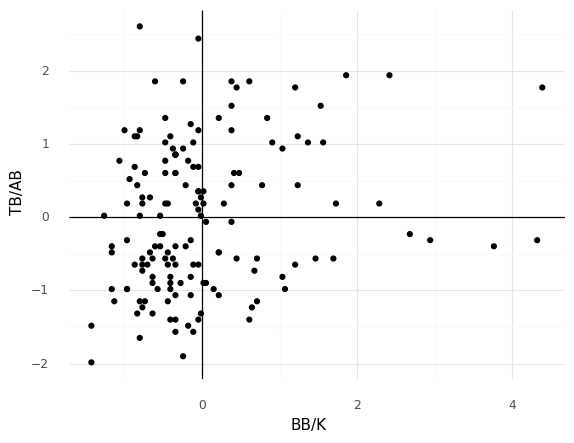

<ggplot: (8783103957405)>

In [8]:
#put graph here to identify spread for clustering
(ggplot(data, aes(x = "BB/K", y = "TB/AB")) + 
geom_point() + 
geom_hline(yintercept = 0) + 
geom_vline(xintercept = 0) +
theme_minimal())

In [39]:
#Conditional assignments
conditions = [(data["TB/AB"] <= 0.5) & (data["TB/AB"] >= -0.5) & (data["BB/K"] <= 0.5) & (data["BB/K"] >= -0.5),
             (data["TB/AB"] < 0) & (data["BB/K"] < 0),
             (data["TB/AB"] > 0) & (data["BB/K"] > 0), 
             (data["TB/AB"] > 0) & (data["BB/K"] < 0), 
             (data["TB/AB"] < 0) & (data["BB/K"] > 0)]

values = ["AVG", "-AVG", "ELITE", "HIT", "Eye"]
data["Profile"] = np.select(conditions, values)
data.head()

BBKmax = data["BB/K"].max()
BBKmin = data["BB/K"].min()
TBABmax = data["TB/AB"].max()
TBABmin = data["TB/AB"].min()

print(BBKmax)
print(BBKmin)
print(TBABmax)
print(TBABmin)

4.386595693090265
-1.4246457688301666
2.6104432404956492
-1.983216288732893


In [10]:
#too see all values/ cluster tiers in the column
unique = data["Profile"].unique()
print(sorted(unique))

['-AVG', 'AVG', 'ELITE', 'Eye', 'HIT']


In [34]:
data["Profile Score"] = data["TB/AB"] + data["BB/K"]
data.head()
profile_score = data.nlargest(25, "Profile Score")
profile_score

Player Team   AB  1B    2B   3B   HR     TB/AB      BB/K Profile  \
58   N. Martorella  COT   46  14   4.0  0.0  1.0  1.775232  4.386596   ELITE   
112    C. DeLauter  ORL  124  20   7.0  1.0  9.0  1.942275  2.416683   ELITE   
83      B. Tinsman  HAR   28   5   2.0  0.0  0.0 -0.312795  4.320932     Eye   
18         Z. Neto  BRE   46   7   4.0  0.0  3.0  1.942275  1.858541   ELITE   
122      J. Miknis  ORL   52  10   1.0  0.0  1.0 -0.396316  3.762790     Eye   
16        C. Davis  BRE   50  19   0.0  0.0  2.0  1.524669  1.530223   ELITE   
90     D. Phillips  HAR   58   9   4.0  0.0  4.0  1.775232  1.201904   ELITE   
38       K. Parada  CHA   28   5   2.0  0.0  0.0 -0.312795  2.941993     Eye   
19     J. Thompson  BRE  108  16   9.0  2.0  3.0  1.023543  1.563055   ELITE   
128    T. Gonzalez  WAR  122  34   6.0  0.0  0.0  0.188332  2.285356   ELITE   
134      J. Jarvis  WAR  100  25   7.0  1.0  4.0  1.858753  0.610930   ELITE   
52      R. Schreck  COT   39   7   1.0  0.0  1.0 -0.229274  2.679338     Eye   
153      D. Keegan   YD   43   8   0.0  0.0  5.0  2.443401 -0.045707     HIT   
97       C. Eliott  HYA   90  24   4.0  1.0  2.0  1.023543  1.366063   ELITE   
17     C. Castillo  BRE   51  13   2.0  0.0  2.0  1.107064  1.234736   ELITE   
57        E. Brown  COT   88  25   3.0  0.0  5.0  1.858753  0.381107   ELITE   
56        J. Grady  COT   78  20   3.0  0.0  4.0  1.775232  0.446771   ELITE   
84       B. Wilken  HAR  129  23  10.0  0.0  6.0  1.357627  0.840753   ELITE   
109      R. Thomas  ORL   49  17   3.0  0.0  0.0  0.940022  1.037745   ELITE   
73         A. Hall  FAL  106  18   7.0  1.0  4.0  1.023543  0.906417   ELITE   
86       T. Levins  HAR  103  17   9.0  0.0  1.0  0.188332  1.727214   ELITE   
2       D. Rushing  BOR  118  22   9.0  0.0  6.0  1.524669  0.381107   ELITE   
142         B. Lee   YD   84  24   4.0  0.0  6.0  2.610443 -0.800840     HIT   
3      C. Knapczyk  BOR  109  26   8.0  1.0  0.0  0.438895  1.234736   ELITE   
67    K. Armstrong  FAL   91  17   4.0  0.0  7.0  1.858753 -0.242698     HIT   

     Profile Score  
58        6.161828  
112       4.358958  
83        4.008137  
18        3.800816  
122       3.366474  
16        3.054892  
90        2.977136  
38        2.629199  
19        2.586597  
128       2.473688  
134       2.469684  
52        2.450065  
153       2.397694  
97        2.389606  
17        2.341800  
57        2.239861  
56        2.222003  
84        2.198380  
109       1.977766  
73        1.929960  
86        1.915546  
2         1.905776  
142       1.809603  
3         1.673631  
67        1.616055

In [36]:
profileScore = "ProfileScore.csv"
profile_score.to_csv(profileScore)

In [845]:
profile = "PlateProfile.csv"
data.to_csv(profile)

In [21]:
elite = data[data["Profile"] == "ELITE"]
index = elite.index
rows = len(index)
print(rows)
elite

23


Player Team   AB  1B    2B   3B   HR     TB/AB      BB/K Profile
2       D. Rushing  BOR  118  22   9.0  0.0  6.0  1.524669  0.381107   ELITE
3      C. Knapczyk  BOR  109  26   8.0  1.0  0.0  0.438895  1.234736   ELITE
16        C. Davis  BRE   50  19   0.0  0.0  2.0  1.524669  1.530223   ELITE
17     C. Castillo  BRE   51  13   2.0  0.0  2.0  1.107064  1.234736   ELITE
18         Z. Neto  BRE   46   7   4.0  0.0  3.0  1.942275  1.858541   ELITE
19     J. Thompson  BRE  108  16   9.0  2.0  3.0  1.023543  1.563055   ELITE
56        J. Grady  COT   78  20   3.0  0.0  4.0  1.775232  0.446771   ELITE
57        E. Brown  COT   88  25   3.0  0.0  5.0  1.858753  0.381107   ELITE
58   N. Martorella  COT   46  14   4.0  0.0  1.0  1.775232  4.386596   ELITE
59         L. Gold  COT   86  13   4.0  0.0  6.0  1.357627  0.216948   ELITE
61      R.  Ritter  COT   91  24   4.0  1.0  1.0  0.605937  0.413939   ELITE
73         A. Hall  FAL  106  18   7.0  1.0  4.0  1.023543  0.906417   ELITE
77     J. Bohrofen  FAL  129  20   8.0  3.0  5.0  1.190585  0.381107   ELITE
84       B. Wilken  HAR  129  23  10.0  0.0  6.0  1.357627  0.840753   ELITE
85    P. Cavenaugh  HAR  105  25   7.0  0.0  1.0  0.438895  0.775090   ELITE
86       T. Levins  HAR  103  17   9.0  0.0  1.0  0.188332  1.727214   ELITE
90     D. Phillips  HAR   58   9   4.0  0.0  4.0  1.775232  1.201904   ELITE
97       C. Eliott  HYA   90  24   4.0  1.0  2.0  1.023543  1.366063   ELITE
109      R. Thomas  ORL   49  17   3.0  0.0  0.0  0.940022  1.037745   ELITE
112    C. DeLauter  ORL  124  20   7.0  1.0  9.0  1.942275  2.416683   ELITE
128    T. Gonzalez  WAR  122  34   6.0  0.0  0.0  0.188332  2.285356   ELITE
134      J. Jarvis  WAR  100  25   7.0  1.0  4.0  1.858753  0.610930   ELITE
147       T. Smith   YD  115  22   6.0  0.0  4.0  0.605937  0.479603   ELITE

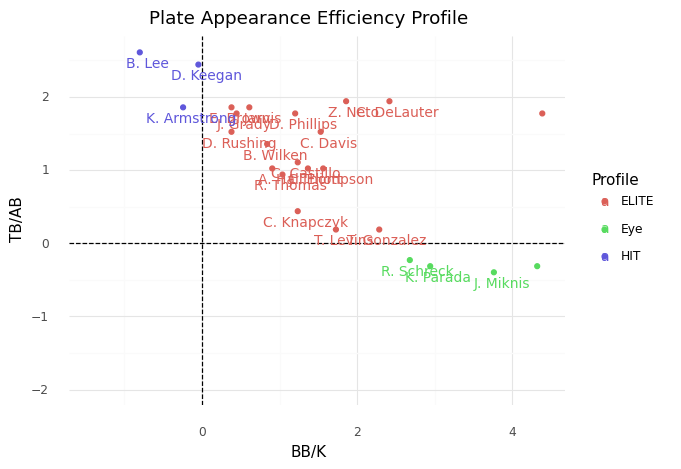

<ggplot: (8783104864181)>

In [32]:
(ggplot(profile_score, aes(x = "BB/K", y = "TB/AB", color = "Profile")) + 
geom_hline(yintercept = 0, linetype = "dashed") + 
geom_vline(xintercept = 0, linetype = "dashed") +
geom_point() +
geom_text(aes(label=profile_score["Player"]),nudge_x = 0.1 , nudge_y = -0.15, size = 10) +
xlim(BBKmin, BBKmax) + 
ylim(TBABmin, TBABmax) + 
theme_minimal() + 
ggtitle("Plate Appearance Efficiency Profile"))